1. Classification on the Wine Dataset
Assignment Task:
* Use the Wine dataset for a multi-class classification problem.
* Implement a Random Forest Classifier to predict the wine category based on various chemical properties.
* Evaluate the model's performance using cross-validation and provide a detailed report on the classification accuracy, precision, recall, and F1-score.
Additional Challenges:
* Compare the performance of Random Forest with other classifiers (e.g., Logistic Regression, SVM).
* Visualize feature importance and discuss which features have the most impact on the classification.

In [23]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('./Archive/Machine Learning/Dataset/wine_dataset.csv')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic_acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280_OD315_of_diluted_wines  178 non-null    float64
 13  Proli

In [25]:
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [27]:
df.columns

Index(['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       'OD280_OD315_of_diluted_wines', 'Proline'],
      dtype='object')

In [28]:
df['Class'].unique()

array([1, 2, 3], dtype=int64)

In [29]:
from sklearn.model_selection import train_test_split

In [40]:
X = df.drop('Class',axis=1)
y = df['Class']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
# Use 10 random trees
model = RandomForestClassifier(n_estimators=10,max_features='sqrt',random_state=101)

In [44]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [45]:
preds = model.predict(X_test)
preds.shape

(54,)

## Evaluation

In [46]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,accuracy_score

In [47]:
confusion_matrix(y_test,preds)

array([[18,  1,  0],
       [ 0, 22,  0],
       [ 0,  0, 13]], dtype=int64)

In [48]:
cm = confusion_matrix(y_test, preds)

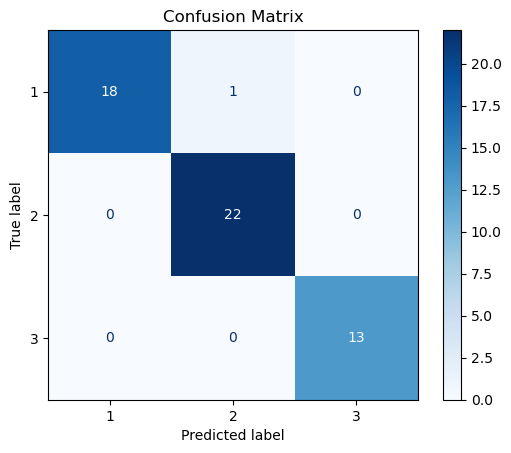

In [49]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()

In [50]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.96      1.00      0.98        22
           3       1.00      1.00      1.00        13

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [51]:
model.feature_importances_

array([0.06243546, 0.02174999, 0.00568099, 0.03429298, 0.02791613,
       0.03983577, 0.14815989, 0.02876669, 0.00701002, 0.19314329,
       0.17524102, 0.07906885, 0.17669891])

# Telco Customer Churn dataset

In [3]:
df = pd.read_csv('./Archive/Machine Learning/Dataset/Telco-Customer-Churn.csv')

In [20]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [24]:
df['customerID'].unique()

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

In [4]:
df = df.drop('customerID', axis=1)

In [26]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [27]:
df['OnlineBackup']

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
7027     No
7028    Yes
7029     No
7030     No
7031     No
Name: OnlineBackup, Length: 7032, dtype: object

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


## Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = pd.get_dummies(df.drop('Churn',axis=1),drop_first=True)
y = df['Churn']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
n_estimators = [100, 128, 150, 200]
max_features = [2,3,4]
bootstrap = [True]
oob_score = [True, False]

In [10]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  # Note, oob_score only makes sense when bootstrap=True!

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [14]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_features': [2, 3, 4],
                         'n_estimators': [100, 128, 150, 200],
                         'oob_score': [True, False]})

In [15]:
grid.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 150, 'oob_score': False}

In [16]:
predictions = grid.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,accuracy_score

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1580
         Yes       0.62      0.49      0.55       530

    accuracy                           0.80      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.80      0.79      2110



In [20]:
cm = confusion_matrix(y_test, predictions)

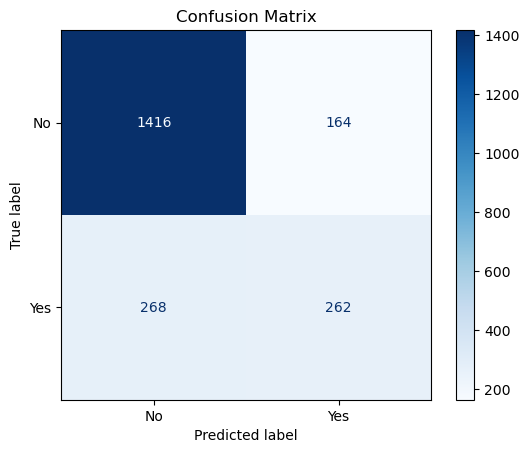

In [21]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()

In [ ]:
from skle

In [43]:
# Use 10 random trees
model = RandomForestClassifier(n_estimators=100,max_features='sqrt',random_state=101)

In [44]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=101)

In [45]:
preds = model.predict(X_test)
preds.shape

(2110,)

In [37]:
y_test.shape

(2110,)

In [46]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,accuracy_score

In [47]:
confusion_matrix(y_test,preds)

array([[1418,  162],
       [ 264,  266]], dtype=int64)

In [48]:
cm = confusion_matrix(y_test, preds)

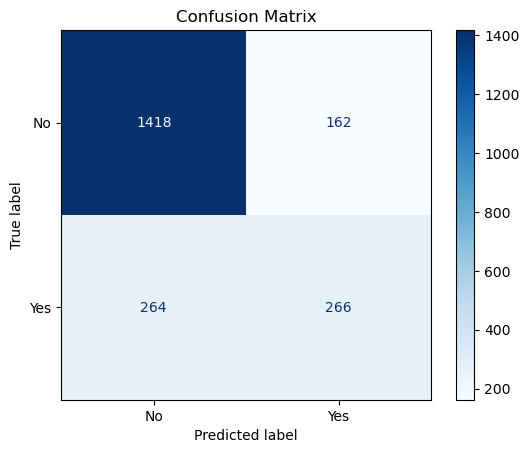

In [49]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()

In [50]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1580
         Yes       0.62      0.50      0.56       530

    accuracy                           0.80      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.79      0.80      0.79      2110

